###Problem Statement
 From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##K-Mean Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

##How to choose the value of "K number of clusters" in K-means Clustering?

The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms. But choosing the optimal number of clusters is a big task. There are some different ways to find the optimal number of clusters, but here we are discussing the most appropriate method to find the number of clusters or value of K

##Elbow Method


The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.

In [ ]:
wcss = []
for i in range(1,16):
  kmean= KMeans(n_clusters=i , init = 'k-means++',max_iter=300,n_init=10,random_state=0)
  kmean.fit(data)
  wcss.append(kmean.inertia_)

In [ ]:
print(wcss)

[681.3706, 152.34795176035792, 78.85144142614601, 57.25600931571815, 46.44618205128205, 39.03998724608725, 34.299712121212124, 30.014398496240602, 28.036906353450473, 26.53452922077922, 24.017409798327485, 22.611814560232247, 21.2926111288597, 20.297750017748587, 19.211721918432453]


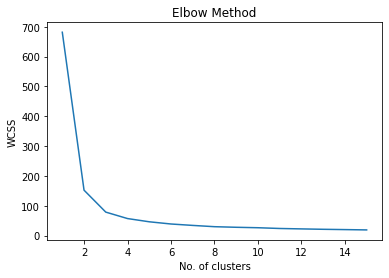

In [ ]:
#Visualising elbow method

plt.plot(range(1,16),wcss)
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

So the optimal number of clusters = 5

In [ ]:
#Creating object kmean of classs Kmeans()
kmean = KMeans(n_clusters=3 , init="k-means++", n_init=10 , max_iter=300,random_state=0)


In [ ]:
pred = kmean.fit_predict(data)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
pred.astype

<function ndarray.astype>

In [ ]:
#converting x into ndarry to aviod error
data = np.array(data)

In [ ]:
data.astype

<function ndarray.astype>

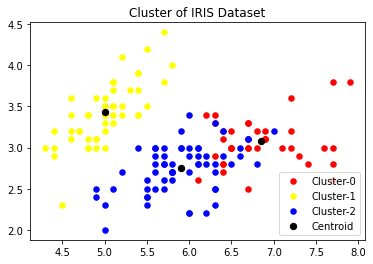

In [ ]:
plt.scatter(data[pred == 0,0 ], data[pred == 0,1],s= 30,c='red')
plt.scatter(data[pred == 1,0 ], data[pred == 1,1],s= 30,c='yellow')
plt.scatter(data[pred == 2,0 ], data[pred == 2,1],s= 30,c='blue')


#Centroid
plt.scatter(kmean.cluster_centers_[:,0] , kmean.cluster_centers_[:,1],s=40,c="black")


plt.title("Cluster of IRIS Dataset")
plt.legend(["Cluster-0","Cluster-1","Cluster-2","Centroid",])
plt.show()